In [1]:
import numpy as np
from scipy import integrate as intg 

import magnonRPA as rpa

from matplotlib import pyplot as plt 
from matplotlib import colors as mclr
from matplotlib import colormaps as cmaps

import time

In [15]:
fermion_spectrum = rpa.fermion_spectra(40,40,2001,10.)
fermion_spectrum.generate_YRZ(rpa.t,1.4*rpa.t,0.01*rpa.t)

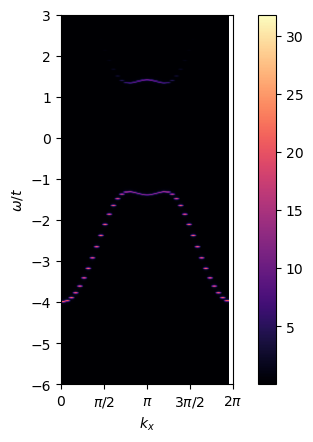

In [16]:
fermion_spectrum.plot_spectrum([-6.*rpa.t,3.*rpa.t])

## Testing time-ordered calculations

In [2]:
### Location of hole spectral functions
holesDirectory = "../data/hole_spectra/05052025/2ksamples/" 
holesFile = holesDirectory+"jon_request_0.05" 

### Load in spectral function
kxs,kys,ws,G = rpa.time_ordered.load_G(holesFile)

### If this is true we will use a fictious box spectral function
### Useful to make vectorized grids and keep track of sizes of arrays
kxvs,kyvs,wvs = np.meshgrid(kxs,kys,ws,indexing='ij')
Nkx = len(kxs)
Nky = len(kys)
Nw = len(ws)
dw = ws[1]-ws[0]
print("Nkx,Nky,Nw: ", Nkx,Nky,Nw)
print("dw: ",dw)


Nkx,Nky,Nw:  40 40 2000
dw:  0.01000500250125036


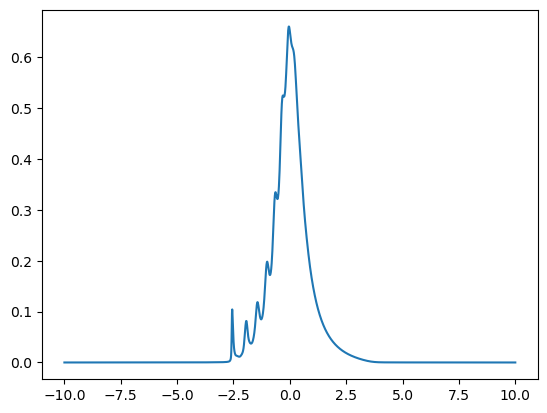

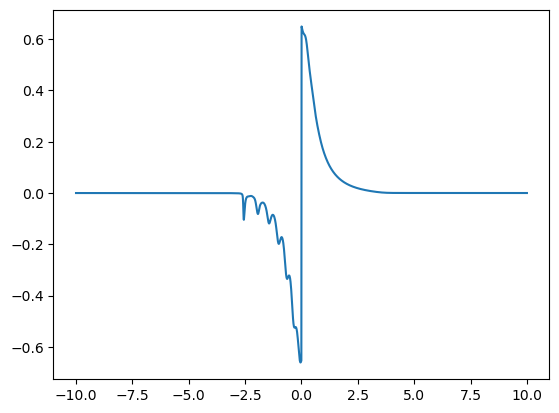

In [3]:
A = -1./np.pi*np.imag(G)
plt.plot(ws,A[0,0,:])
plt.show()

G_TO = rpa.time_ordered.G_R2TO(kxs,kys,ws,G)
A = -1./np.pi*np.imag(G_TO)
plt.plot(ws,A[0,0,:])
plt.show()


In [4]:
mus = np.linspace(-6.*rpa.t,6.*rpa.t,5)
deltas = np.array([ rpa.time_ordered.calc_density(kxs,kys,ws,G,mus[i]) for i in range(len(mus)) ])
dos = [ np.mean(-1./np.pi*np.imag(rpa.time_ordered.add_mu(ws,G,mus[i])),axis=(0,1)) for i in range(len(mus)) ]


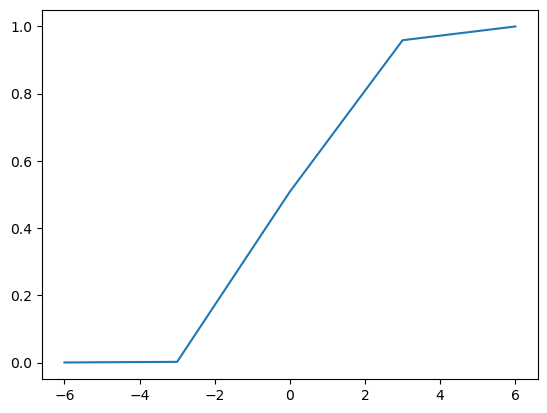

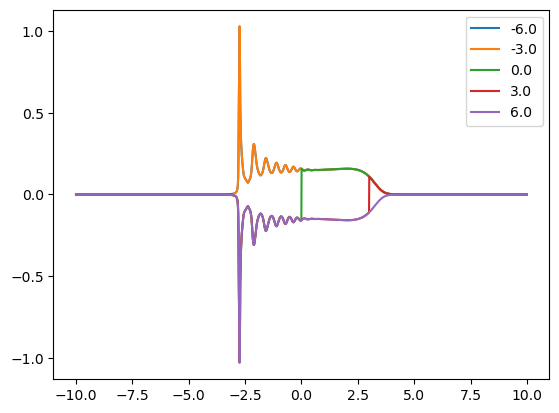

In [5]:
plt.plot(mus,deltas)
plt.show()

for i in range(len(mus)):
    plt.plot(ws,dos[i],label=str(mus[i]))
    plt.legend()
plt.show()

In [6]:
U = 8.*rpa.t ### Hubbard U (used to compute J)
J = 4.*rpa.t**2/U ### Superexchange J
mu = -2.6*rpa.t ### Chemical potential (controls doping)
G = rpa.time_ordered.G_R2TO(kxs,kys,ws,G)
### Compute doping
delta = rpa.time_ordered.calc_density(kxs,kys,ws,G,mu)
print("Hole doping: {d:0.2%}".format(d=delta))
print("J/t used in LSWT: {jt:0.2f}".format(jt=J/rpa.t))

Hole doping: 9.92%
J/t used in LSWT: 0.50


In [7]:
### Calculate RPA spectra from hole spectra 
t0 = time.time()
Pi = rpa.time_ordered.calc_Pi(kxs,kys,ws,G,mu)
t1 = time.time()
print("Time for RPA: ",t1-t0,"s")


Time for RPA:  18.592539072036743 s


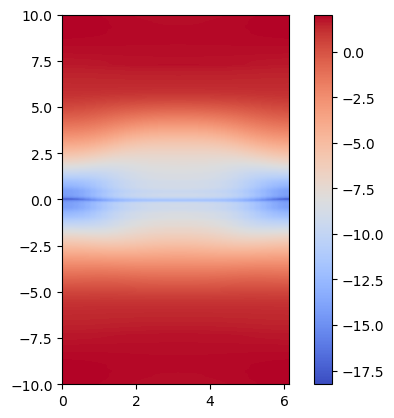

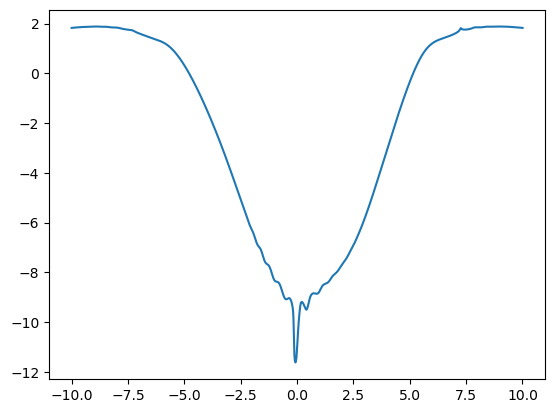

In [13]:
plt.imshow(np.imag(np.transpose(Pi[0,0,:,0,:])),origin='lower',extent=[kxs[0],kxs[-1],ws[0],ws[-1]],aspect=.5,cmap='coolwarm')
plt.colorbar()
plt.show()
plt.plot(rpa.gen_magnon_freqs(ws),np.imag(Pi[0,0,0,20,:]))
plt.show()

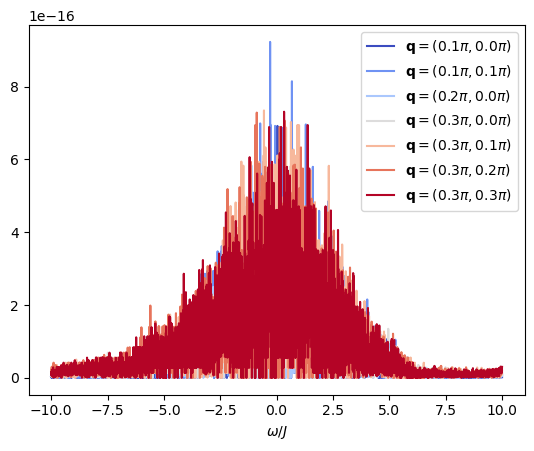

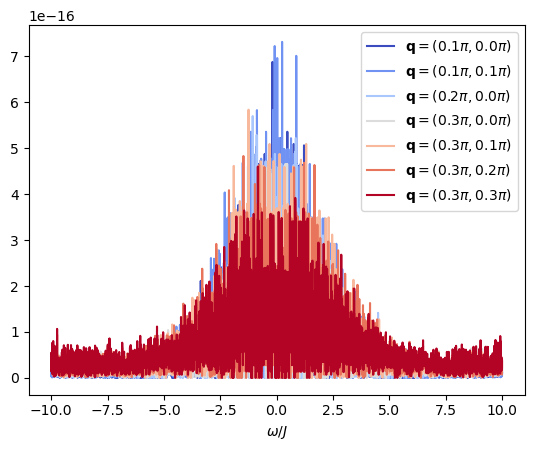

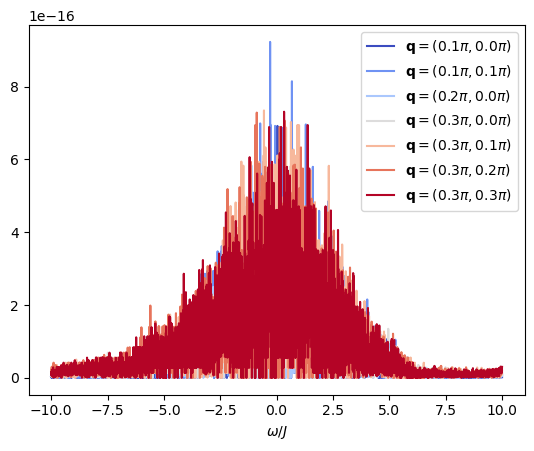

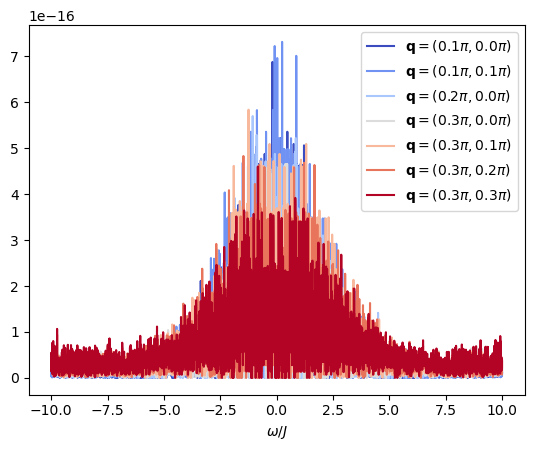

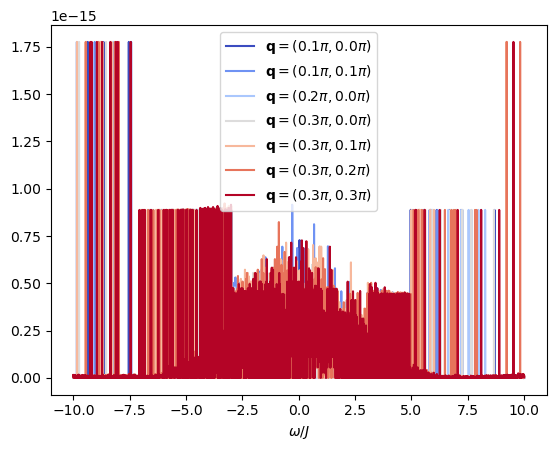

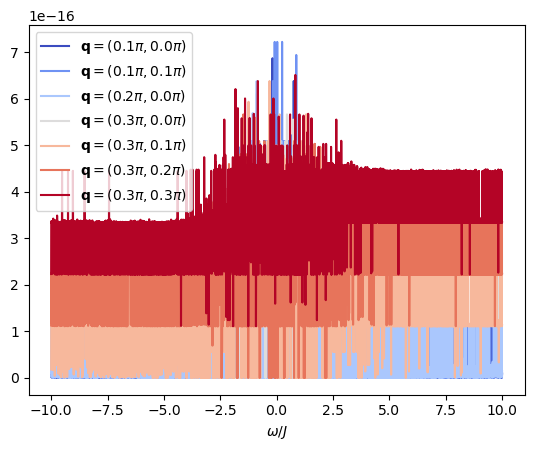

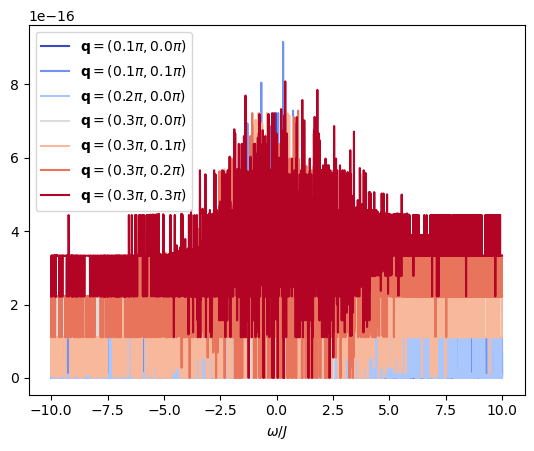

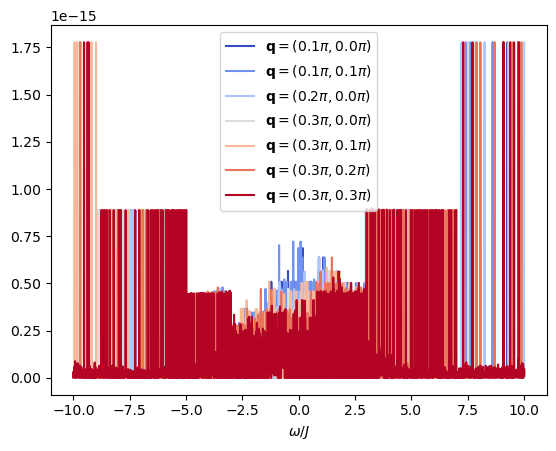

In [489]:
### Frequency-momentum cuts of RPA function
indices = [[2,0],[2,2],[4,0],[6,0],[6,2],[6,4],[6,6]]
clrs = cmaps['coolwarm'](np.linspace(0.0,1.,len(indices)))
label_strings = [ r'$\mathbf{q}=($'+"{qx:0.1f}".format(qx=kxs[i[0]]/np.pi) + r'$\pi,$' + "{qy:0.1f}".format(qy=kys[i[1]]/np.pi) + r'$\pi)$'  for i in indices]

### Frequency cuts of Pi for magnons
for a in range(2):
    for b in range(2):
        for j in range(len(indices)):
            i = indices[j]
            plt.plot(rpa.gen_magnon_freqs(ws),np.abs( Pi[b,i[0],i[1],:] - Pi[b,-i[0],-i[1],:]) ,label=label_strings[j],color=clrs[j])
        plt.xlabel(r'$\omega/J$')
        plt.legend()
        #plt.yscale('log')
        plt.show()

### Frequency-momentum cuts of RPA function
indices = [[2,0],[2,2],[4,0],[6,0],[6,2],[6,4],[6,6]]
clrs = cmaps['coolwarm'](np.linspace(0.0,1.,len(indices)))
label_strings = [ r'$\mathbf{q}=($'+"{qx:0.1f}".format(qx=kxs[i[0]]/np.pi) + r'$\pi,$' + "{qy:0.1f}".format(qy=kys[i[1]]/np.pi) + r'$\pi)$'  for i in indices]

### Frequency cuts of Pi for magnons
for a in range(2):
    for b in range(2):
        for j in range(len(indices)):
            i = indices[j]
            plt.plot(rpa.gen_magnon_freqs(ws),np.abs( kernel[a,b,i[0],i[1],:] - kernel[a,b,-i[0],-i[1],:]) ,label=label_strings[j],color=clrs[j])
        plt.xlabel(r'$\omega/J$')
        plt.legend()
        #plt.yscale('log')
        plt.show()

In [461]:
for i in

In [404]:
def convolver_freq(f,g):
    pad_size = len(f)
    f_padded = np.pad(f,(pad_size,pad_size))
    g_padded = np.pad(g,(pad_size,pad_size))

    f_fft = np.fft.ifftn(f_padded,norm='forward')
    g_fft = np.fft.ifftn(g_padded,norm='forward')

    h_fft = np.conjugate(f_fft)*g_fft

    h_padded = np.fft.fftn(h_fft,norm='forward')
    
    h = np.fft.fftshift(h_padded,axes=-1)
    
    if pad_size % 2 ==0 :
        h = h[pad_size:(len(h_padded)-pad_size+1)] ### We chop to get odd size with zero in middle

    else:
        h = h[pad_size:(len(h_padded)-pad_size)]
        
    return np.real(h)

In [262]:
z = np.linspace(-10.,10.,81)
dz = z[1]-z[0]
f = Gaussian(z,0.)*z
g = Gaussian(z,0.)
h = convolver_freq(f,g)*dz


In [263]:
h_analytic = np.zeros_like(h)
for i in range(len(h)):
    func = lambda s: Gaussian(s,0.)*np.tanh(s) * Gaussian(s+z[i],0.)
    h_analytic[i] = intg.quad(func,-10.,10.)[0]
    h_analytic[i] = -0.5*z[i]*np.exp(-z[i]**2/2.)*np.sqrt(np.pi/2.)

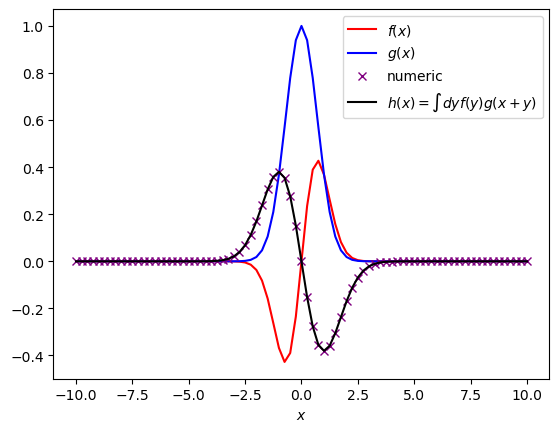

In [264]:
plt.plot(z,f,color='red',label=r'$f(x)$')
plt.plot(z,g,color='blue',label=r'$g(x)$')
plt.plot(z,h,'x',color='purple',label=r'numeric')
#plt.plot(h,'x',color='purple',label=r'numeric')
plt.plot(z,h_analytic,color='black',label=r'$h(x) = \int dy f(y) g(x+y) $')
plt.xlabel(r'$x$')
plt.legend()
plt.show()